In [1]:
import sys
import os
current_dir = os.getcwd()
print(current_dir)


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'F:\\Dino\\UCB-USACE-LSTMs\\UCB_training\\models\\warm_springs_all', 'C:\\Users\\Dino\\anaconda3\\python312.zip', 'C:\\Users\\Dino\\anaconda3\\DLLs', 'C:\\Users\\Dino\\anaconda3\\Lib', 'C:\\Users\\Dino\\anaconda3', '', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

## Set up Working Directory

In [5]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'warm_springs_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("warm_springs")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all
Train Basin File Exists: False


In [6]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("warm_springs_dam.yaml") #update the yaml file for different basins

## Standard daily LSTM (no ensembles, no physics), train on training subset, evaluated on validation period

In [8]:
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False)

In [9]:
lstmNoPhysicsDaily.train()

2025-02-12 10:26:30,791: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102630\output.log initialized.
2025-02-12 10:26:30,792: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102630
2025-02-12 10:26:30,795: ### Run configurations for testing_run
2025-02-12 10:26:30,796: experiment_name: testing_run
2025-02-12 10:26:30,798: train_basin_file: warm springs
2025-02-12 10:26:30,800: validation_basin_file: warm springs
2025-02-12 10:26:30,801: test_basin_file: warm springs
2025-02-12 10:26:30,801: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:26:30,801: train_end_date: 2002-09-30 00:00:00
2025-02-12 10:26:30,801: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:26:30,801: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:26:30,801: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:26:30,801: test_end_date: 2009-09-30 00:00:00
2025-02-12 10:26:30,801: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]
2025-02-12 10:26:47,790: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102630\validation\model_epoch008\validation_metrics.csv
2025-02-12 10:26:47,794: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102630\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_1202_102630')

got predictions


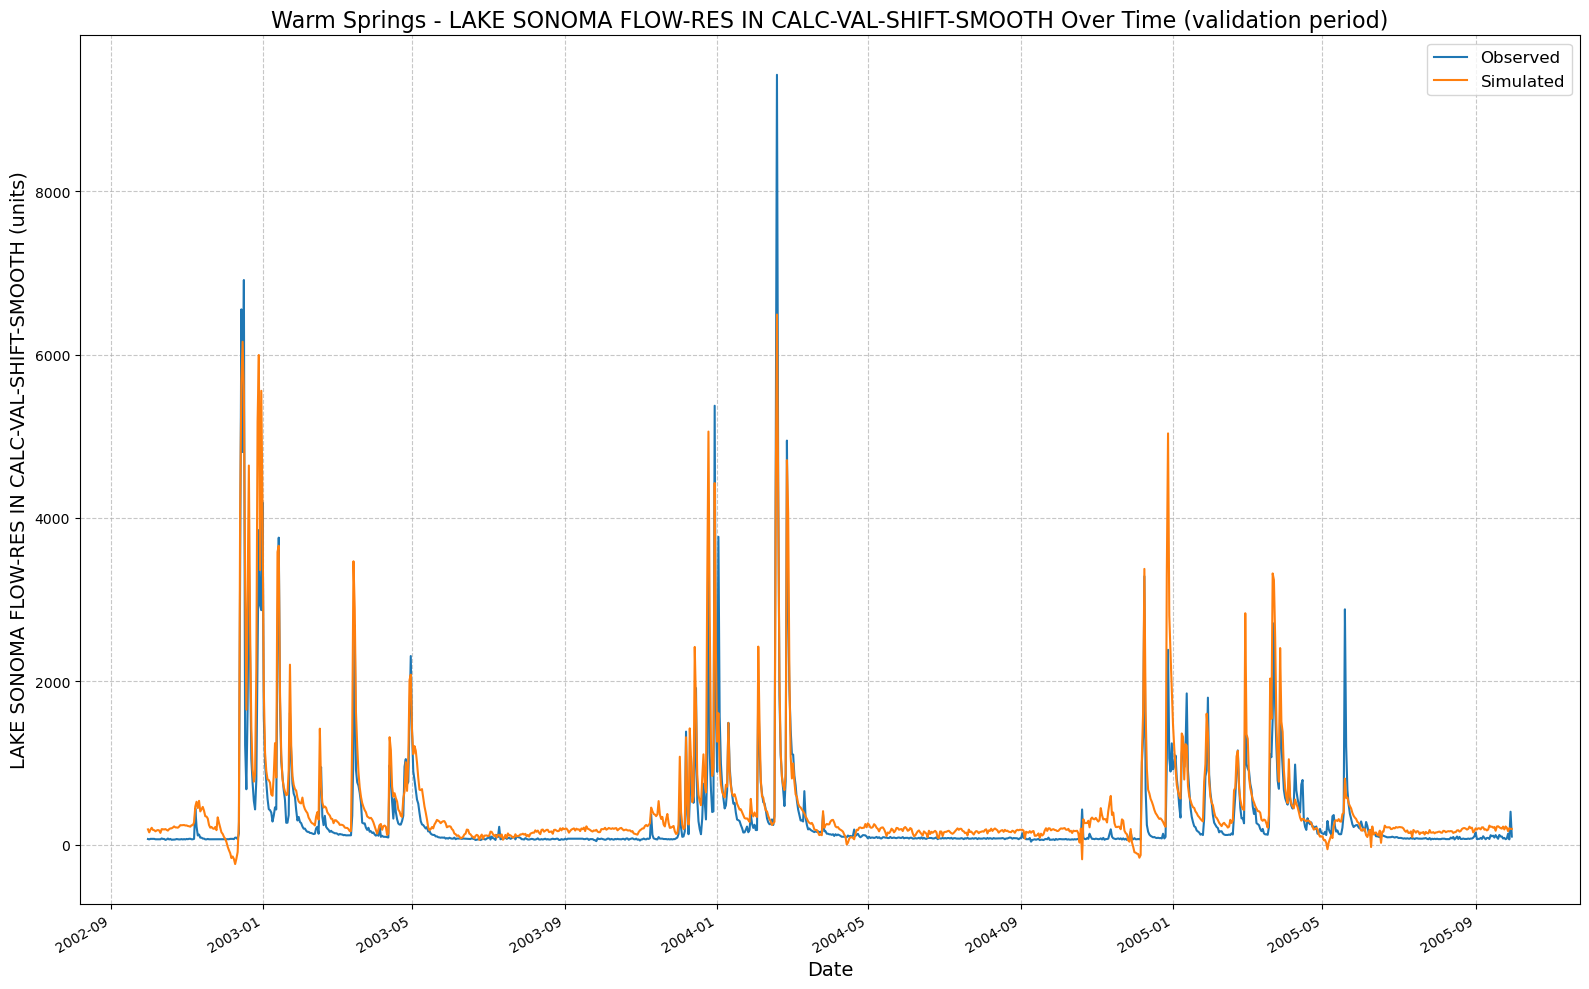

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102630\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [25]:
#outputs simple graph, also logs where the csv where the results are stored (use this csv for when you plot combined graph), also prints the metrics
lstmNoPhysicsDaily_results_path_csv, lstmNoPhysicsDaily_results_metrics = lstmNoPhysicsDaily.results() 

## Physics-Informed LSTM (PLSTM) trained on training set, validated on validation set


In [12]:
path_to_physics_data = Path(library_path +"/russian_river_data/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [13]:
lstmPhysicsDaily.train()

2025-02-12 10:26:48,642: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102648\output.log initialized.
2025-02-12 10:26:48,642: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102648
2025-02-12 10:26:48,642: ### Run configurations for testing_run
2025-02-12 10:26:48,642: experiment_name: testing_run
2025-02-12 10:26:48,642: train_basin_file: warm springs
2025-02-12 10:26:48,642: validation_basin_file: warm springs
2025-02-12 10:26:48,642: test_basin_file: warm springs
2025-02-12 10:26:48,642: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:26:48,642: train_end_date: 2002-09-30 00:00:00
2025-02-12 10:26:48,642: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:26:48,642: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:26:48,661: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:26:48,663: test_end_date: 2009-09-30 00:00:00
2025-02-12 10:26:48,664: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]
2025-02-12 10:27:02,260: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102648\validation\model_epoch008\validation_metrics.csv
2025-02-12 10:27:02,263: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102648\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_1202_102648')

got predictions


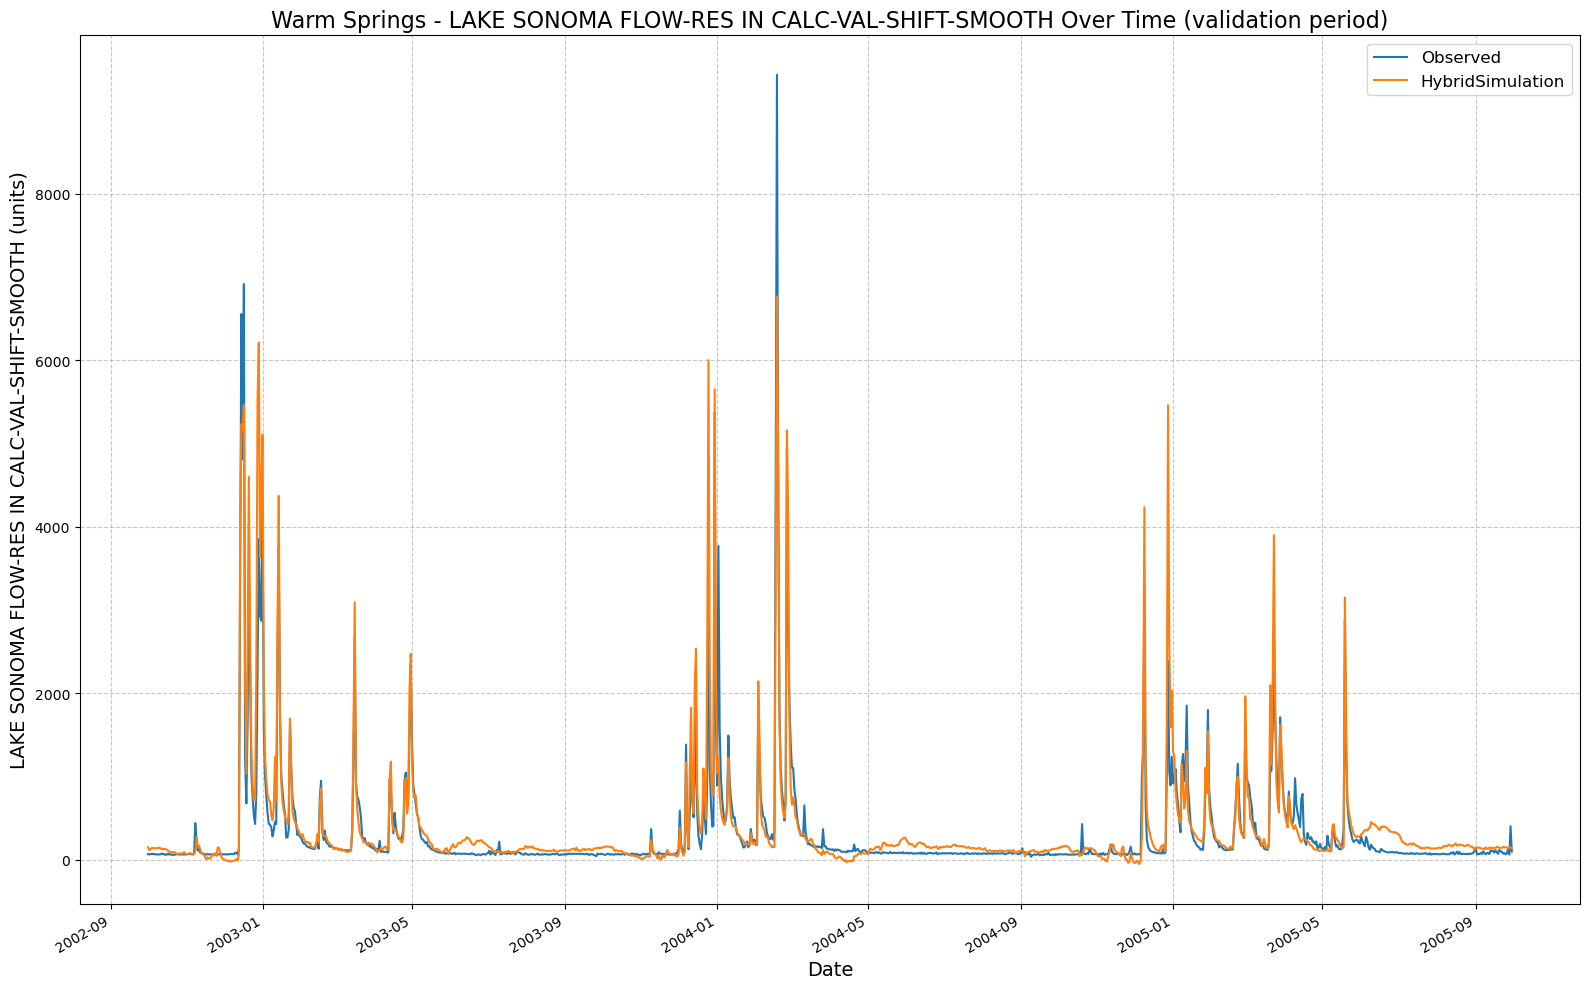

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_102648\results_output_validation.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [19]:
lstmPhysicsDaily_results_path_csv, lstmPhysicsDaily_results_metrics = lstmPhysicsDaily.results()

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be rem

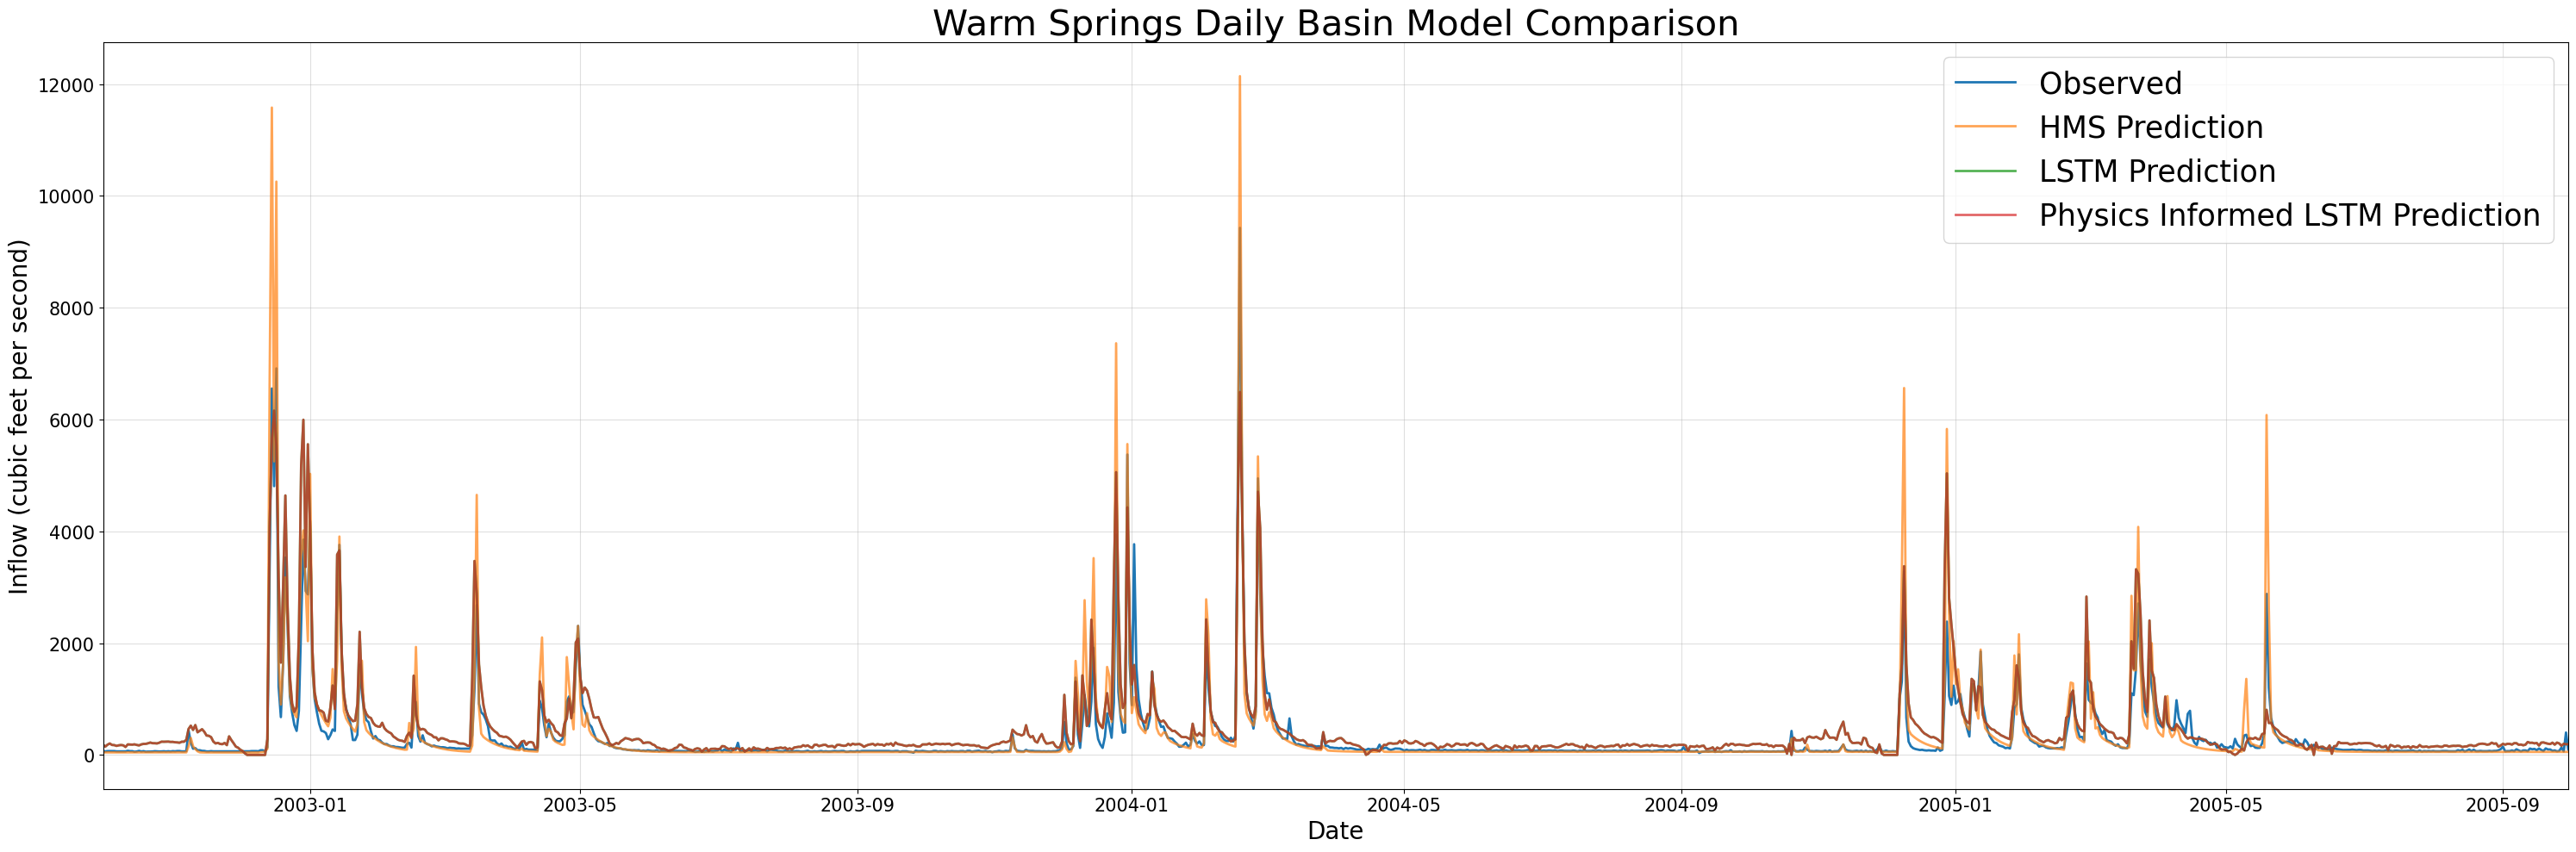

In [27]:
lstm_results_path = lstmNoPhysicsDaily_results_path_csv
lstmPhysics_results_path = lstmPhysicsDaily_results_path_csv
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Warm Springs Daily Basin Model Comparison', fName = "warm_springs_daily_eval_metrics.csv")

In [29]:
metrics_df

HMS           LSTM  Physics_Informed_LSTM
NSE               0.695977       0.754687               0.754687
MSE          149067.929476  120281.585338          120281.585338
RMSE            386.093162     346.816357             346.816357
KGE               0.629017       0.561341               0.561341
Alpha-NSE         1.354590       1.089374               1.089374
Beta-KGE          1.087426       1.419604               1.419604
Beta-NSE          0.040637       0.195040               0.195040
Pearson-r         0.934800       0.908532               0.908532
FHV              34.412169       9.460958               9.460958
FMS              11.222054     -31.019190             -31.019190
FLV              75.923474   -2725.591375           -2725.591375
Peak-Timing       0.000000       0.200000               0.200000
Peak-MAPE        57.593945      27.127731              27.127731

## If you prefer the interactive plotly graph , you can use 'fancyCombinedPlot' (must have plotly library downloaded)

In [32]:
path_to_physics_data = Path(library_path +"/russian_river_data/WarmSprings_Inflow_daily.csv")

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be rem

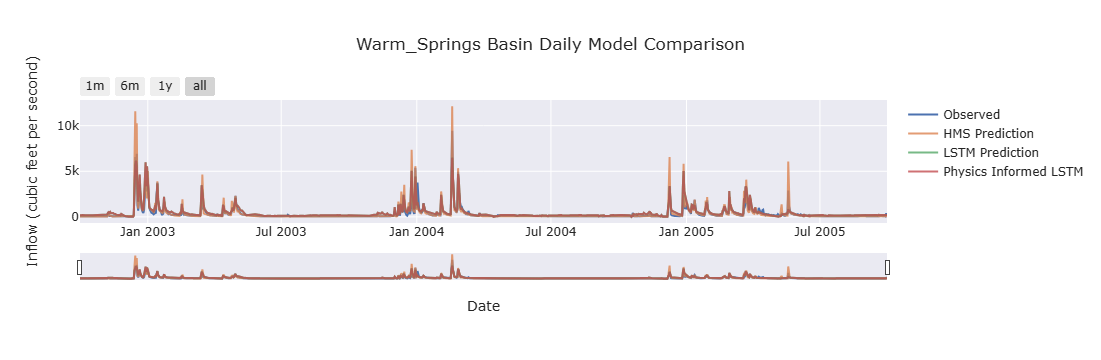

HMS           LSTM  Physics_Informed_LSTM
NSE               0.695977       0.754687               0.754687
MSE          149067.929476  120281.585338          120281.585338
RMSE            386.093162     346.816357             346.816357
KGE               0.629017       0.561341               0.561341
Alpha-NSE         1.354590       1.089374               1.089374
Beta-KGE          1.087426       1.419604               1.419604
Beta-NSE          0.040637       0.195040               0.195040
Pearson-r         0.934800       0.908532               0.908532
FHV              34.412169       9.460958               9.460958
FMS              11.222054     -31.019190             -31.019190
FLV              75.923474   -2725.591375           -2725.591375
Peak-Timing       0.000000       0.200000               0.200000
Peak-MAPE        57.593945      27.127731              27.127731

In [34]:
fancyCombinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Warm_Springs Basin Daily Model Comparison', fName = "warm_springs_daily_eval_metrics.csv")

## Re-train standard daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [37]:
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [39]:
lstmNoPhysicsDailyExt.train()

2025-02-12 10:30:18,358: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018\output.log initialized.
2025-02-12 10:30:18,361: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018
2025-02-12 10:30:18,364: ### Run configurations for testing_run
2025-02-12 10:30:18,366: experiment_name: testing_run
2025-02-12 10:30:18,366: train_basin_file: warm springs
2025-02-12 10:30:18,366: validation_basin_file: warm springs
2025-02-12 10:30:18,366: test_basin_file: warm springs
2025-02-12 10:30:18,366: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:30:18,366: train_end_date: 2005-09-30 00:00:00
2025-02-12 10:30:18,381: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:30:18,383: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:30:18,385: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:30:18,387: test_end_date: 2009-09-30 00:00:00
2025-02-12 10:30:18,389: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]
2025-02-12 10:30:54,806: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018\validation\model_epoch016\validation_metrics.csv
2025-02-12 10:30:54,810: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_1202_103018')

2025-02-12 10:33:11,336: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]
2025-02-12 10:33:11,929: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018\test\model_epoch016\test_metrics.csv
2025-02-12 10:33:11,931: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018\test\model_epoch016\test_results.p
got predictions


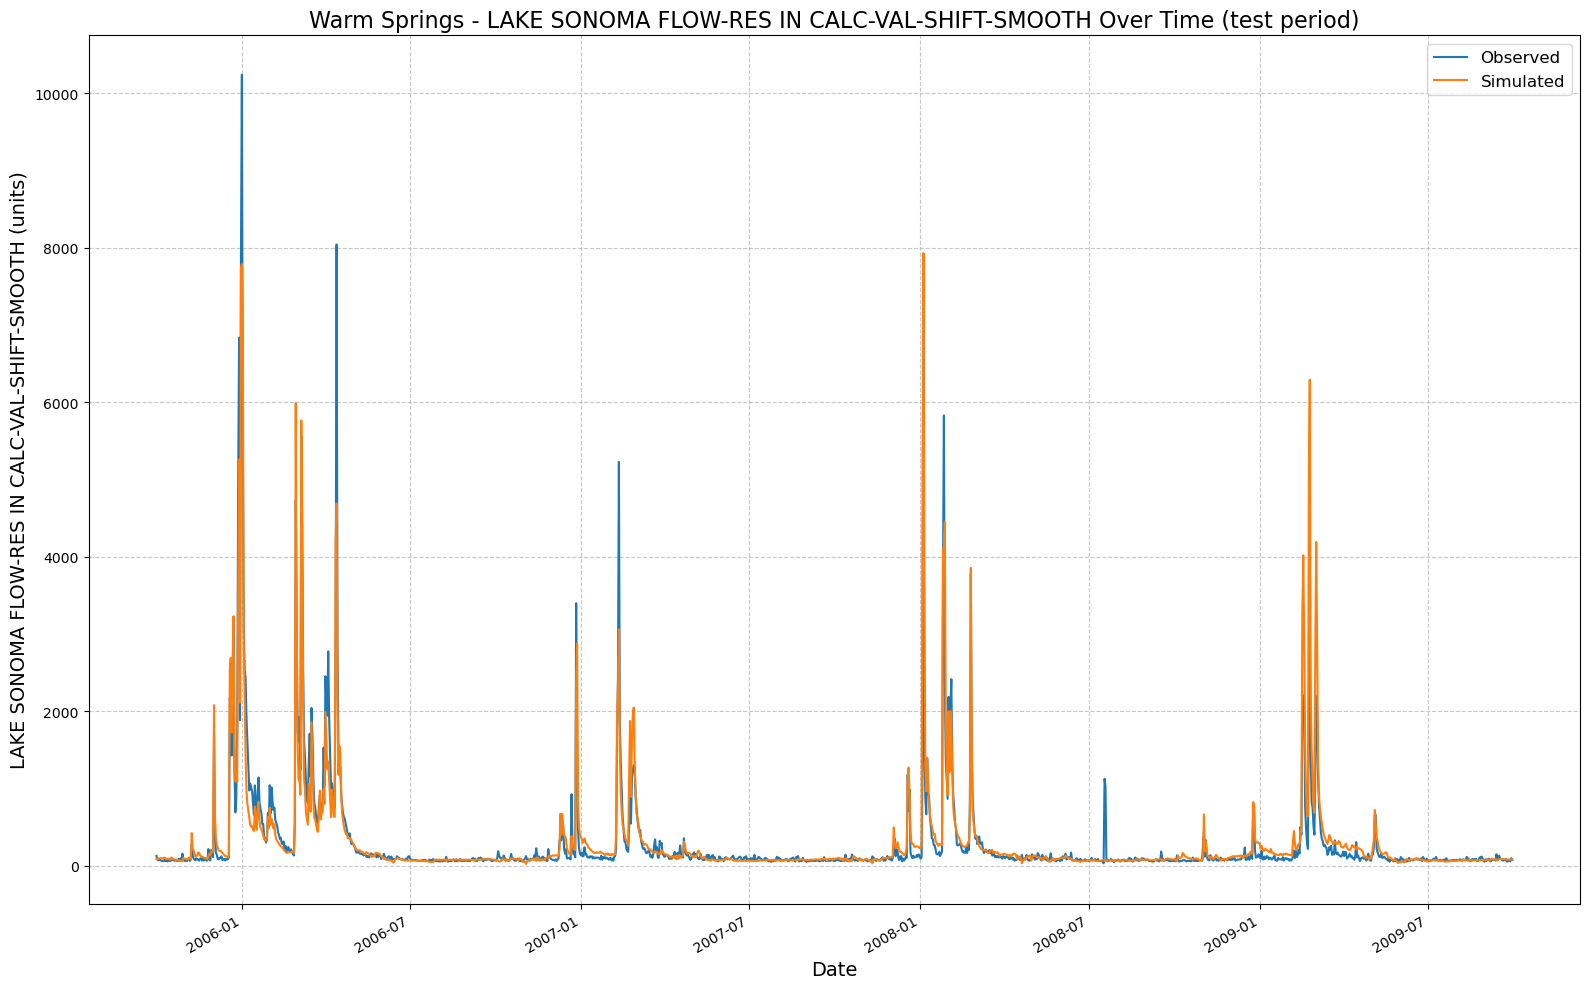

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103018\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [52]:
lstmNoPhysicsDailyExt_results_path_csv, lstmNoPhysicsDailyExt_results_metrics = lstmNoPhysicsDailyExt.results('test')

## Re-train physics daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [43]:
path_to_physics_data = Path(library_path +"/russian_river_data/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [45]:
lstmPhysicsDailyExt.train()

2025-02-12 10:31:33,386: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133\output.log initialized.
2025-02-12 10:31:33,389: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133
2025-02-12 10:31:33,393: ### Run configurations for testing_run
2025-02-12 10:31:33,396: experiment_name: testing_run
2025-02-12 10:31:33,399: train_basin_file: warm springs
2025-02-12 10:31:33,401: validation_basin_file: warm springs
2025-02-12 10:31:33,404: test_basin_file: warm springs
2025-02-12 10:31:33,404: train_start_date: 1994-10-01 00:00:00
2025-02-12 10:31:33,412: train_end_date: 2005-09-30 00:00:00
2025-02-12 10:31:33,414: validation_start_date: 2002-10-01 00:00:00
2025-02-12 10:31:33,416: validation_end_date: 2005-09-30 00:00:00
2025-02-12 10:31:33,418: test_start_date: 2005-10-01 00:00:00
2025-02-12 10:31:33,419: test_end_date: 2009-09-30 00:00:00
2025-02-12 10:31:33,420: device: 

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
2025-02-12 10:32:07,489: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133\validation\model_epoch016\validation_metrics.csv
2025-02-12 10:32:07,492: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/UCB_training/models/warm_springs_all/runs/testing_run_1202_103133')

2025-02-12 10:32:11,488: Using the model weights from F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featur

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]
2025-02-12 10:32:12,502: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133\test\model_epoch016\test_metrics.csv
2025-02-12 10:32:12,505: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133\test\model_epoch016\test_results.p
got predictions


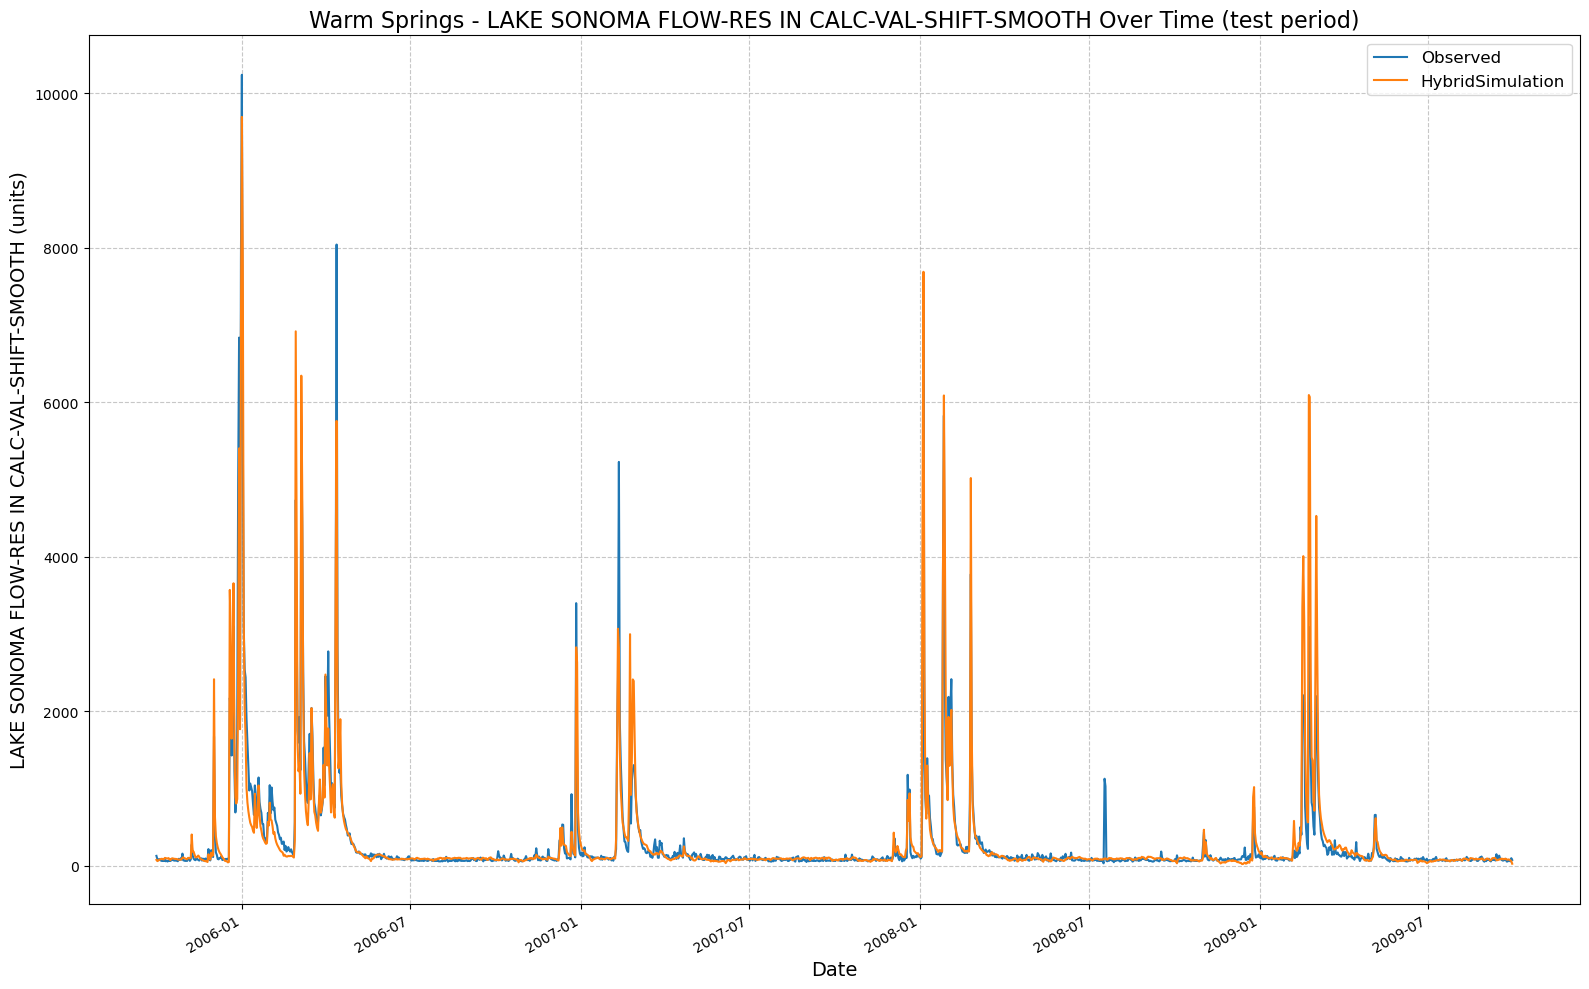

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_103133\results_output_test.csv


F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [47]:
lstmPhysicsDailyExt_results_path_csv, lstmPhysicsDailyExt_results_metrics = lstmPhysicsDailyExt.results('test')

## compare results

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\

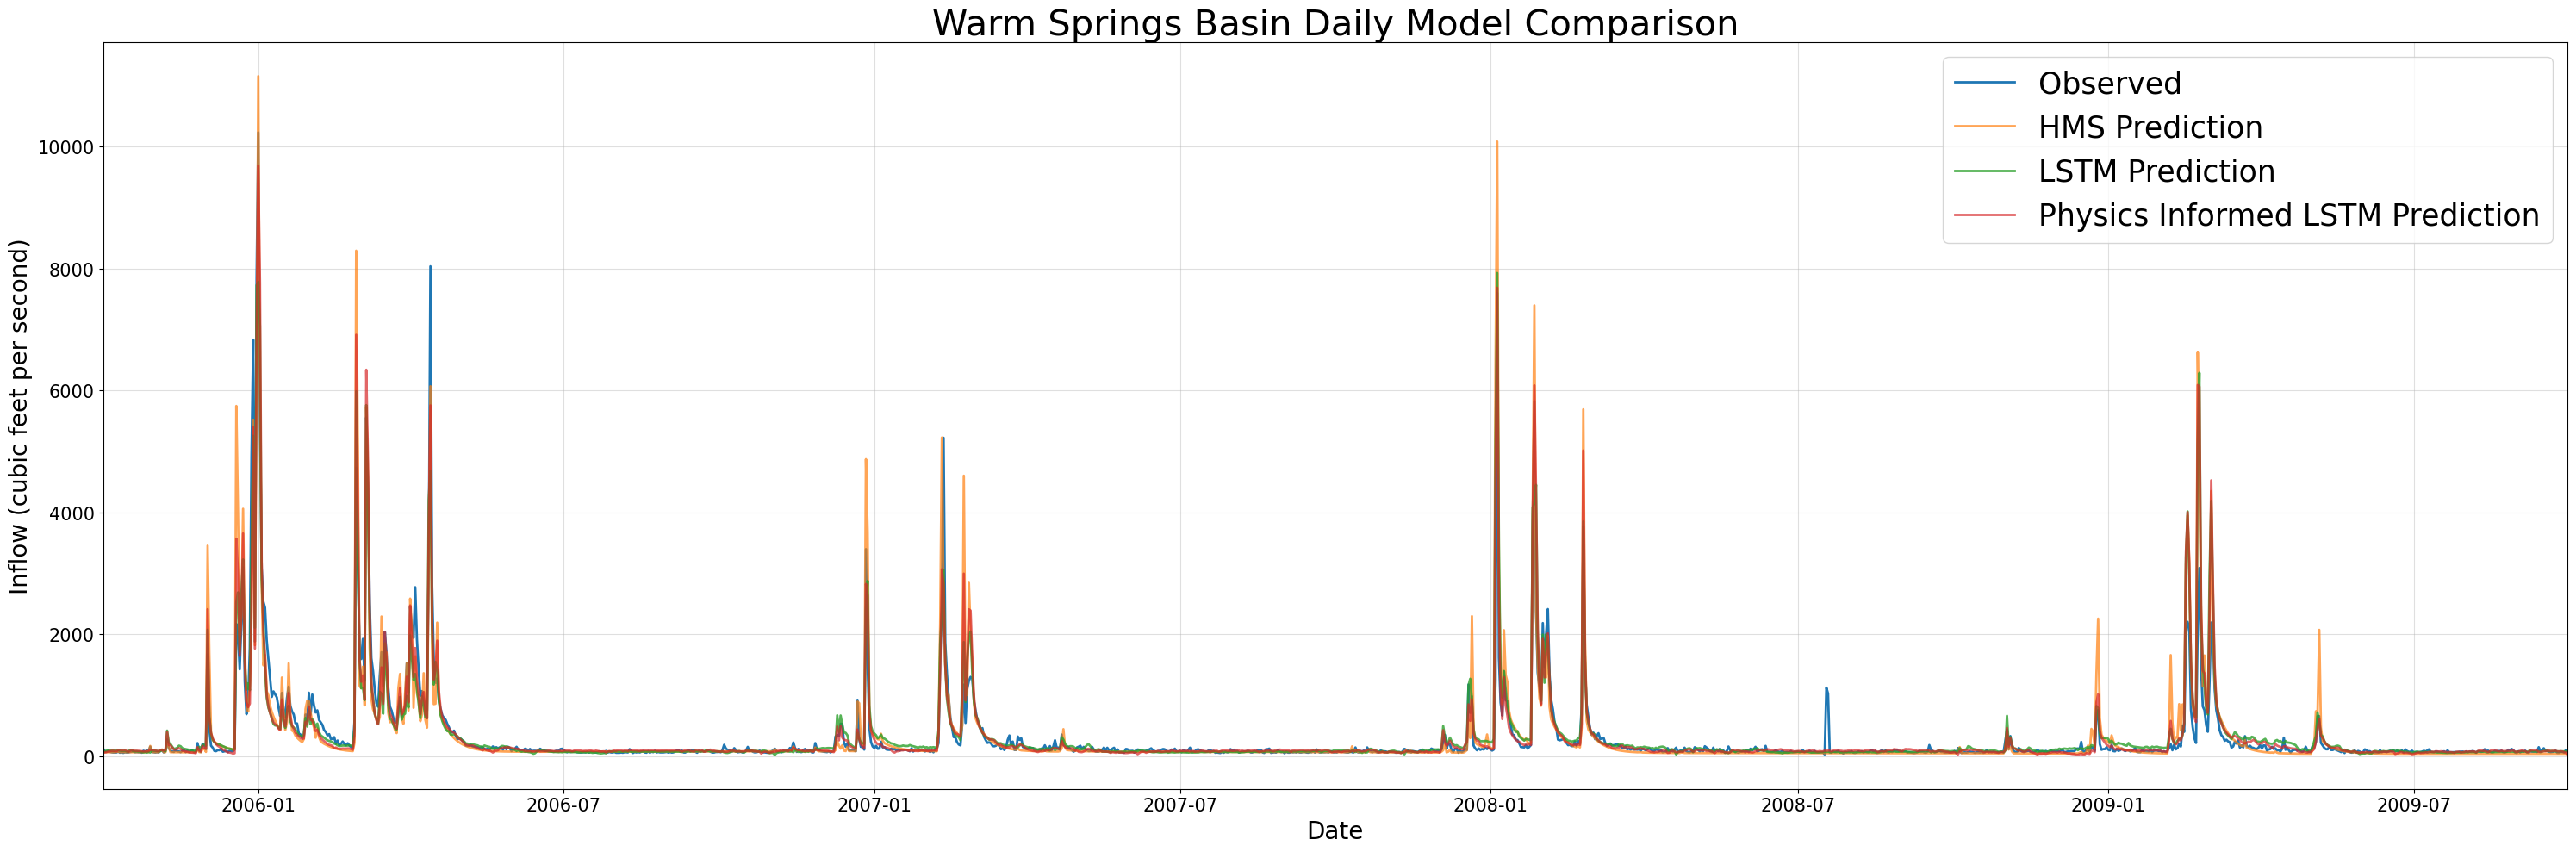

In [54]:
lstm_results_path_ext = lstmNoPhysicsDailyExt_results_path_csv
lstmPhysics_results_path_ext = lstmPhysicsDailyExt_results_path_csv
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Warm Springs Basin Daily Model Comparison', fName = "warm_springs_daily_metrics.csv")

In [56]:
metrics_df

HMS          LSTM  Physics_Informed_LSTM
NSE               0.732378      0.843403               0.845632
MSE          143218.425603  83803.178792           82610.607611
RMSE            378.442103    289.487787             287.420611
KGE               0.791192      0.902412               0.889152
Alpha-NSE         1.179500      1.000451               1.073792
Beta-KGE          1.037987      1.058674               1.045335
Beta-NSE          0.015449      0.023862               0.018438
Pearson-r         0.900312      0.922022               0.930814
FHV              24.454837      5.638333              13.006138
FMS              25.356069     26.928784              -0.305516
FLV              79.358078    -52.209694             -52.482596
Peak-Timing       0.833333      0.166667               0.500000
Peak-MAPE        44.995233     51.502580              44.958440

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\

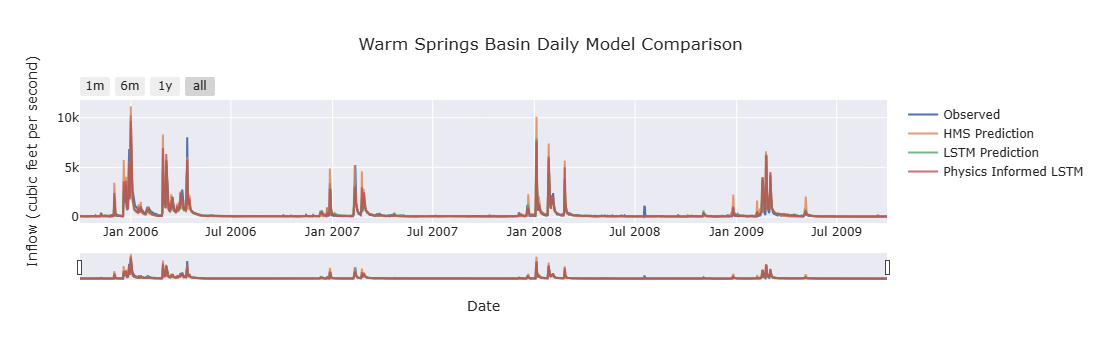

HMS          LSTM  Physics_Informed_LSTM
NSE               0.732378      0.843403               0.845632
MSE          143218.425603  83803.178792           82610.607611
RMSE            378.442103    289.487787             287.420611
KGE               0.791192      0.902412               0.889152
Alpha-NSE         1.179500      1.000451               1.073792
Beta-KGE          1.037987      1.058674               1.045335
Beta-NSE          0.015449      0.023862               0.018438
Pearson-r         0.900312      0.922022               0.930814
FHV              24.454837      5.638333              13.006138
FMS              25.356069     26.928784              -0.305516
FLV              79.358078    -52.209694             -52.482596
Peak-Timing       0.833333      0.166667               0.500000
Peak-MAPE        44.995233     51.502580              44.958440

In [58]:
fancyCombinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Warm Springs Basin Daily Model Comparison', fName = "warm_springs_daily_metrics.csv")